# Text Classification Application: Fake News detection
* Author: Johannes Maucher
* Last update: 24.11.2020

In this notebook conventional Machine Learning algorithms are applied to learn a discriminator-model for distinguishing fake- and non-fake news.

What you will learn:
* Access text from .csv file
* Preprocess text for classification
* Calculate BoW matrix
* Apply conventional machine learning algorithms for fake news detection
* Evaluation of classifiers

## Access Data
In this notebook a [fake-news corpus from Kaggle](https://www.kaggle.com/c/fake-news/data) is applied for training and testing Machine Learning algorithms. Download the 3 files and save it in a directory. The path of this directory shall be assigned to the variable `path`in the following code-cell: 

In [1]:
import pandas as pd
pfad="/Users/johannes/DataSets/fake-news/"
train = pd.read_csv(pfad+'train.csv',index_col=0)
test = pd.read_csv(pfad+'test.csv',index_col=0)
test_labels=pd.read_csv(pfad+'submit.csv',index_col=0)

Data in dataframe `train` is applied for training. The dataframe `test`contains the texts for testing the model and the dataframe `test_labels` contains the true labels of the test-texts. 

In [2]:
print("Number of texts in train-dataframe: \t",train.shape[0])
print("Number of columns in train-dataframe: \t",train.shape[1])
train.head()

Number of texts in train-dataframe: 	 20800
Number of columns in train-dataframe: 	 4


,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Append the test-dataframe with the labels, which are contained in dataframe `test_labels`.

In [3]:
test["label"]=test_labels["label"]

In [4]:
print("Number of texts in test-dataframe: \t",test.shape[0])
print("Number of columns in test-dataframe: \t",test.shape[1])
test.head()

Number of texts in test-dataframe: 	 5200
Number of columns in test-dataframe: 	 4


,title,author,text,label
id,,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


## Data Selection

In the following code cells, first the number of missing-data fields is determined. Then the information in columns `author`, `title` and `text` are concatenated to a single string, which is saved in the column `total`. After this process, only columns `total` and `label` are required, all other columns can be removed in the `train`- and the `test`-dataframe. 

In [5]:
train.isnull().sum(axis=0)

title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
test.isnull().sum(axis=0)

title     122
author    503
text        7
label       0
dtype: int64

In [7]:
train = train.fillna(' ')
train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']

In [8]:
train = train[['total', 'label']]

In [9]:
train.head()

,total,label
id,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [10]:
test = test.fillna(' ')
test['total'] = test['title'] + ' ' + test['author'] + ' ' + test['text']
test = test[['total', 'label']]

## Preprocessing
The input texts in column `total` shall be preprocessed as follows:
* stopwords shall be removed
* all characters, which are neither alpha-numeric nor whitespaces, shall be removed
* all characters shall be represented in lower-case.
* for all words, the lemma (base-form) shall be applied

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [12]:
stop_words = stopwords.words('english')

In [13]:
lemmatizer = WordNetLemmatizer()
for index in train.index:
    #filter_sentence = ''
    sentence = train.loc[index,'total']
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Stopwords removal
    words = [lemmatizer.lemmatize(w).lower() for w in words if not w in stop_words]
    filter_sentence = " ".join(words)
    train.loc[index, 'total'] = filter_sentence

First 5 cleaned texts in the training-dataframe:

In [14]:
train.head()

,total,label
id,,
0,house dem aide we didnt even see comeys letter...,1
1,flynn hillary clinton big woman campus breitba...,0
2,why truth might get you fired consortiumnewsco...,1
3,15 civilians killed in single us airstrike hav...,1
4,iranian woman jailed fictional unpublished sto...,1


Clean data in the test-dataframe in the same way as done for the training-dataframe above:

In [15]:
lemmatizer = WordNetLemmatizer()
for index in test.index:
    #filter_sentence = ''
    sentence = test.loc[index,'total']
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Stopwords removal
    words = [lemmatizer.lemmatize(w).lower() for w in words if not w in stop_words]
    filter_sentence = " ".join(words)
    test.loc[index, 'total'] = filter_sentence

First 5 cleaned texts in the test-dataframe:

In [16]:
test.head()

,total,label
id,,
20800,specter trump loosens tongues not purse string...,0
20801,russian warship ready strike terrorist near al...,1
20802,nodapl native american leaders vow stay all wi...,0
20803,tim tebow will attempt another comeback this t...,1
20804,keiser report meme wars e995 truth broadcast n...,1


## Determine Bag-of-Word Matrix for Training- and Test-Data
In the code-cells below two different types of Bag-of-Word matrices are calculated. The first type contains the **term-frequencies**, i.e. the entry in row $i$, column $j$ is the frequency of word $j$ in document $i$. In the second type, the matrix-entries are not the term-frequencies, but the tf-idf-values. 

Note that for a given typ (term-frequency or tf-idf) a separate matrix must be calculated for training and testing. Since we always pretend, that only training-data is known in advance, the matrix-structure, i.e. the columns (= words) depends only on the training-data. This matrix structure is calculated in the row:

```
count_vectorizer.fit(X_train)
```
and
```
tfidf.fit(freq_term_matrix_train),
```
respectively. An important parameter of the `CountVectorizer`-class is `min_df`. The value, which is assigned to this parameter is the minimum frequency of a word, such that it is regarded in the BoW-matrix. Words, which appear less often are disregarded.

The training data is then mapped to this structure by 
```
count_vectorizer.transform(X_train)
```
and
```
tfidf.transform(X_train),
```
respectively.

For the test-data, however, no new matrix-structure is calculated. Instead the test-data is transformed to the structure of the matrix, defined by the training data.

In [443]:
X_train = train['total'].values
y_train = train['label'].values

In [444]:
X_test = test['total'].values
y_test = test['label'].values

In [445]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

Train BoW-models and transform training-data to BoW-matrix:

In [446]:
count_vectorizer = CountVectorizer(min_df=4)
count_vectorizer.fit(X_train)
freq_term_matrix_train = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix_train)
tf_idf_matrix_train = tfidf.transform(freq_term_matrix_train)

In [447]:
freq_term_matrix_train.toarray().shape

(20800, 55055)

In [448]:
tf_idf_matrix_train.toarray().shape

(20800, 55055)

Transform test-data to BoW-matrix:

In [449]:
freq_term_matrix_test = count_vectorizer.transform(X_test)
tf_idf_matrix_test = tfidf.transform(freq_term_matrix_test)

## Train a linear classifier
Below a [Logistic Regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) is trained. This is just a linear classifier with a sigmoid- or softmax- activity-function. 

In [450]:
X_train=tf_idf_matrix_train
X_test=tf_idf_matrix_test
#X_train=freq_term_matrix_train
#X_test=freq_term_matrix_test

In [451]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate trained model
First, the trained model is applied to predict the class of the training-samples:

In [462]:
y_pred_train = logreg.predict(X_train)

In [463]:
y_pred_train

array([1, 1, 1, ..., 0, 1, 1])

In [464]:
from sklearn.metrics import classification_report

The model's prediction are compared with the true classes of the training-samples. The classification-report contains the common metrics for evaluating classifiers:

In [461]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10387
           1       0.98      0.99      0.98     10413

    accuracy                           0.98     20800
   macro avg       0.98      0.98      0.98     20800
weighted avg       0.98      0.98      0.98     20800



The output of the classification report shows, that the model is well fitted to the training data, since it predicts training data with an accuracy of 98%.

However, accuracy on the training-data, provides no information on the model's capability to classify new data. Therefore, below the model's prediction on the test-dataset is calculated:

In [465]:
y_pred_test = logreg.predict(X_test)

In [466]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      2339
           1       0.69      0.63      0.66      2861

    accuracy                           0.64      5200
   macro avg       0.64      0.64      0.64      5200
weighted avg       0.64      0.64      0.64      5200



The model's accuracy on the test-data is weak. The model is overfitted on the training-data. It seems that the distribution of test-data is significantly different from the distribution of training-data. 

The main drawback in this experiment is possibly the application of the BoW-model to represent texts. BoW disregards word-order and semantic relations between words. The application of word-embeddings and neural networks like CNNs and LSTMs may perform much better.

In [17]:
train.head()

,total,label
id,,
0,house dem aide we didnt even see comeys letter...,1
1,flynn hillary clinton big woman campus breitba...,0
2,why truth might get you fired consortiumnewsco...,1
3,15 civilians killed in single us airstrike hav...,1
4,iranian woman jailed fictional unpublished sto...,1


In [18]:
from tensorflow.keras.preprocessing import text

In [81]:
MAX_NB_WORDS=5000

In [82]:
tokenizer=text.Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train["total"])

In [83]:
trainSeq=tokenizer.texts_to_sequences(train["total"])

In [84]:
testSeq=tokenizer.texts_to_sequences(test["total"])

In [85]:
tokenizer.num_words

5000

In [86]:
textlenghtsTrain=[len(t) for t in trainSeq]

In [87]:
textlenghtsTest=[len(t) for t in testSeq]

In [88]:
from matplotlib import pyplot as plt

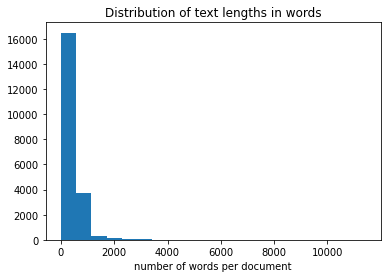

In [89]:
plt.hist(textlenghtsTrain,bins=20)
plt.title("Distribution of text lengths in words")
plt.xlabel("number of words per document")
plt.show()

In [90]:
textlenghtsTrain.sort(reverse=True)

In [91]:
textlenghtsTrain[:10]

[11420, 9852, 9250, 8712, 8365, 8189, 7403, 6643, 6321, 6295]

In [92]:
MAX_SEQUENCE_LENGTH=800
EMBEDDING_DIM=100

In [93]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [94]:
X_train = pad_sequences(trainSeq, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(testSeq, maxlen=MAX_SEQUENCE_LENGTH)

In [95]:
y_train = to_categorical(np.asarray(train["label"]))
y_test = to_categorical(np.asarray(test["label"]))

In [96]:
from tensorflow.keras.layers import Embedding, Dense, Input, Flatten, Conv1D, MaxPooling1D, Dropout, Concatenate, GlobalMaxPool1D
from tensorflow.keras.models import Model

In [97]:
embedding_layer = Embedding(MAX_NB_WORDS,
                            EMBEDDING_DIM,
                            #weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [98]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(32, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(2)(l_cov1)
l_cov2 = Conv1D(64, 3, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)
l_flat = Flatten()(l_pool2)
l_dense = Dense(64, activation='relu')(l_flat)
preds = Dense(2, activation='softmax')(l_dense)
model = Model(sequence_input, preds)

In [99]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 800)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 800, 100)          500000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 796, 32)           16032     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 398, 32)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 396, 64)           6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 79, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5056)             

In [100]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=6, verbose=True, batch_size=128)

Epoch 1/6
163/163 [==============================] - 22s 138ms/step - loss: 0.2304 - categorical_accuracy: 0.8953 - val_loss: 1.9827 - val_categorical_accuracy: 0.6463
Epoch 2/6
163/163 [==============================] - 22s 136ms/step - loss: 0.0531 - categorical_accuracy: 0.9819 - val_loss: 3.0537 - val_categorical_accuracy: 0.6338
Epoch 3/6
163/163 [==============================] - 24s 145ms/step - loss: 0.0272 - categorical_accuracy: 0.9922 - val_loss: 3.9840 - val_categorical_accuracy: 0.6340
Epoch 4/6
163/163 [==============================] - 23s 144ms/step - loss: 0.0146 - categorical_accuracy: 0.9953 - val_loss: 5.3817 - val_categorical_accuracy: 0.6344
Epoch 5/6
163/163 [==============================] - 24s 148ms/step - loss: 0.0066 - categorical_accuracy: 0.9982 - val_loss: 7.9740 - val_categorical_accuracy: 0.6285
Epoch 6/6
163/163 [==============================] - 25s 155ms/step - loss: 0.0074 - categorical_accuracy: 0.9984 - val_loss: 8.2986 - val_categorical_accuracy: